---

_You are currently looking at **version 1.2** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-social-network-analysis/resources/yPcBs) course resource._

---

# Assignment 4

In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import pickle

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

---

## Part 1 - Random Graph Identification

For the first part of this assignment you will analyze randomly generated graphs and determine which algorithm created them.

In [2]:
P1_Graphs = pickle.load(open('A4_graphs','rb'))
P1_Graphs

<br>
`P1_Graphs` is a list containing 5 networkx graphs. Each of these graphs were generated by one of three possible algorithms:
* Preferential Attachment (`'PA'`)
* Small World with low probability of rewiring (`'SW_L'`)
* Small World with high probability of rewiring (`'SW_H'`)

Anaylze each of the 5 graphs and determine which of the three algorithms generated the graph.

*The `graph_identification` function should return a list of length 5 where each element in the list is either `'PA'`, `'SW_L'`, or `'SW_H'`.*

In [3]:
for G in P1_Graphs:
    print(nx.average_shortest_path_length(G))

4.099161161161161
5.089871871871872
9.378702269692925
3.1048046283934134
5.0785509568313305


In [4]:
for G in P1_Graphs:
    print(nx.average_clustering(G))

0.03167539146454044
0.5642419635919628
0.4018222222222227
0.03780379975223251
0.0033037037037037037


In [5]:
for G in P1_Graphs:
    print(max(G.degree().items(), key=lambda x: x[1])[1])

100
13
6
92
11


In [6]:
for G in P1_Graphs:
    print(nx.info(G))

Name: barabasi_albert_graph(1000,2)
Type: Graph
Number of nodes: 1000
Number of edges: 1996
Average degree:   3.9920
Name: watts_strogatz_graph(1000,10,0.05)
Type: Graph
Number of nodes: 1000
Number of edges: 5000
Average degree:  10.0000
Name: watts_strogatz_graph(750,5,0.075)
Type: Graph
Number of nodes: 750
Number of edges: 1500
Average degree:   4.0000
Name: barabasi_albert_graph(750,4)
Type: Graph
Number of nodes: 750
Number of edges: 2984
Average degree:   7.9573
Name: watts_strogatz_graph(750,4,1)
Type: Graph
Number of nodes: 750
Number of edges: 1500
Average degree:   4.0000


In [7]:
def graph_identification():
    
    return ['PA','SW_L','SW_L','PA','SW_H']

---

## Part 2 - Company Emails

For the second part of this assignment you will be workking with a company's email network where each node corresponds to a person at the company, and each edge indicates that at least one email has been sent between two people.

The network also contains the node attributes `Department` and `ManagementSalary`.

`Department` indicates the department in the company which the person belongs to, and `ManagementSalary` indicates whether that person is receiving a management position salary.

In [4]:
G = nx.read_gpickle('email_prediction.txt')

print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 1005
Number of edges: 16706
Average degree:  33.2458


In [9]:
nx.is_directed(G)

False

In [10]:
s_attr_department = pd.Series(nx.get_node_attributes(G, "Department"))
s_attr_managementSalary = pd.Series(nx.get_node_attributes(G, "ManagementSalary"))
s_node_degree = pd.Series(G.degree())
s_node_degree_centrality = pd.Series(nx.degree_centrality(G))
s_node_closeness_centrality = pd.Series(nx.closeness_centrality(G))
s_node_betweenness_centrality = pd.Series(nx.betweenness_centrality(G))
s_node_page_rank = pd.Series(nx.pagerank(G, alpha=0.95))
s_node_clustering_coef = pd.Series(nx.clustering(G))

avg_shortest_path_len_by_node = {}
for node in G.nodes():
    tmp = nx.shortest_path_length(G, node)
    avg_shortest_path_len_by_node[node] = sum(tmp.values()) / len(tmp.keys())
    
s_node_avg_shortest_path_len = pd.Series(avg_shortest_path_len_by_node)

In [11]:
data = s_attr_department.to_frame().merge(s_attr_managementSalary.to_frame(), left_index=True, right_index=True, how='left').\
    merge(s_node_degree.to_frame(), left_index=True, right_index=True, how='left').\
    merge(s_node_degree_centrality.to_frame(), left_index=True, right_index=True, how='left').\
    merge(s_node_closeness_centrality.to_frame(), left_index=True, right_index=True, how='left').\
    merge(s_node_betweenness_centrality.to_frame(), left_index=True, right_index=True, how='left').\
    merge(s_node_page_rank.to_frame(), left_index=True, right_index=True, how='left').\
    merge(s_node_clustering_coef.to_frame(), left_index=True, right_index=True, how='left').\
    merge(s_node_avg_shortest_path_len.to_frame(), left_index=True, right_index=True, how='left')

data.columns = ['DEPARTMENT','TARGET','DEGREE','DEGREE_CNTR','CLOSENESS_CNTR','BETWEENNESS_CNTR','PAGERANK','CLUSTERING_COEF','AVG_SPL']

<ipython-input-11-03fca97f4c56>:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'0_x'} in the result is deprecated and will raise a MergeError in a future version.
  data = s_attr_department.to_frame().merge(s_attr_managementSalary.to_frame(), left_index=True, right_index=True, how='left').\
<ipython-input-11-03fca97f4c56>:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'0_x'} in the result is deprecated and will raise a MergeError in a future version.
  data = s_attr_department.to_frame().merge(s_attr_managementSalary.to_frame(), left_index=True, right_index=True, how='left').\
<ipython-input-11-03fca97f4c56>:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'0_x'} in the result is deprecated and will raise a MergeError in a future version.
  data = s_attr_department.to_frame().merge(s_attr_managementSalary.to_frame(), left_index=True, right_index=True, how='left').\


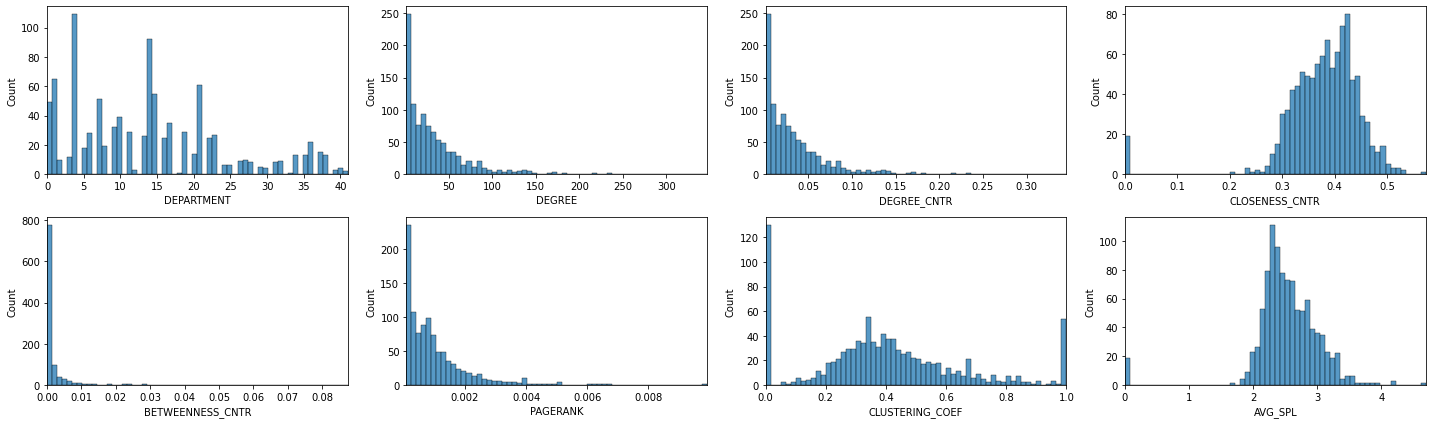

In [12]:
nrows, ncols = 2, 4
fig, axs = plt.subplots(nrows, ncols, figsize=(20,6))

for i, col in enumerate(['DEPARTMENT','DEGREE','DEGREE_CNTR','CLOSENESS_CNTR','BETWEENNESS_CNTR','PAGERANK','CLUSTERING_COEF','AVG_SPL']):
    
    sns.histplot(data=data[col], bins=60, ax=axs[i//ncols, i%ncols]).autoscale(axis='x', tight=True);
    
fig.tight_layout()

In [ ]:
for feature in ['CLOSENESS_CNTR','CLUSTERING_COEF','AVG_SPL']:
    data[feature] = RobustScaler().fit_transform( np.array(data[feature]).reshape(-1,1) )

for feature in ['DEPARTMENT','DEGREE','DEGREE_CNTR','BETWEENNESS_CNTR','PAGERANK']:
    data[feature] = MinMaxScaler().fit_transform( np.array(data[feature]).reshape(-1,1) )
    
nrows, ncols = 2, 4
fig, axs = plt.subplots(nrows, ncols, figsize=(20,6))
for i, col in enumerate(['DEPARTMENT','DEGREE','DEGREE_CNTR','CLOSENESS_CNTR','BETWEENNESS_CNTR','PAGERANK','CLUSTERING_COEF','AVG_SPL']):
    sns.histplot(data=data[col], bins=60, ax=axs[i//ncols, i%ncols]).autoscale(axis='x', tight=True);    
fig.tight_layout()

In [22]:
data.corr().style.background_gradient(cmap='viridis')

,DEPARTMENT,TARGET,DEGREE,DEGREE_CNTR,CLOSENESS_CNTR,BETWEENNESS_CNTR,PAGERANK,CLUSTERING_COEF,AVG_SPL
DEPARTMENT,1.000000,0.166695,0.195517,0.195517,0.116739,0.185117,0.191169,-0.012335,-0.094445
TARGET,0.166695,1.000000,0.549782,0.549782,0.380419,0.451935,0.548433,-0.021997,-0.260783
DEGREE,0.195517,0.549782,1.000000,1.000000,0.673939,0.799805,0.992475,-0.194092,-0.460793
DEGREE_CNTR,0.195517,0.549782,1.000000,1.000000,0.673939,0.799805,0.992475,-0.194092,-0.460793
CLOSENESS_CNTR,0.116739,0.380419,0.673939,0.673939,1.000000,0.404912,0.591621,0.092360,-0.028887
BETWEENNESS_CNTR,0.185117,0.451935,0.799805,0.799805,0.404912,1.000000,0.812216,-0.204197,-0.277598
PAGERANK,0.191169,0.548433,0.992475,0.992475,0.591621,0.812216,1.000000,-0.228045,-0.538475
CLUSTERING_COEF,-0.012335,-0.021997,-0.194092,-0.194092,0.092360,-0.204197,-0.228045,1.000000,0.157739
AVG_SPL,-0.094445,-0.260783,-0.460793,-0.460793,-0.028887,-0.277598,-0.538475,0.157739,1.000000


In [23]:
data.drop(columns=['DEGREE','PAGERANK'], inplace=True)
data_train_val = data[ ~data.TARGET.isna() ]
data_test = data[ data.TARGET.isna() ]
data_train_val.shape, len(data_test)

((753, 7), 252)

In [24]:
X_train_val= data_train_val.drop(columns=['TARGET'])
y_train_val = data_train_val['TARGET']
X_test = data_test.drop(columns=['TARGET'])
y_test = data_test['TARGET']

In [25]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

In [26]:
y_train.value_counts(dropna=False)

0.0    504
1.0     98
Name: TARGET, dtype: int64

In [27]:
lr_model = LogisticRegression(class_weight='balanced',  # The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data
                              verbose=1,
                              random_state=42,
                              n_jobs=-1).fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.5s finished


In [28]:
roc_auc_score(y_val, lr_model.predict_proba(X_val)[:, 1])

0.9084249084249084

In [29]:
pd.Series(lr_model.predict_proba(X_val)[:, 1], index=y_val.index).sort_index()

4       0.721504
11      0.525163
15      0.569391
32      0.420248
42      0.754843
          ...   
982     0.047583
983     0.343863
998     0.045382
999     0.043783
1003    0.025650
Length: 151, dtype: float64

### Part 2A - Salary Prediction

Using network `G`, identify the people in the network with missing values for the node attribute `ManagementSalary` and predict whether or not these individuals are receiving a management position salary.

To accomplish this, you will need to create a matrix of node features using networkx, train a sklearn classifier on nodes that have `ManagementSalary` data, and predict a probability of the node receiving a management salary for nodes where `ManagementSalary` is missing.



Your predictions will need to be given as the probability that the corresponding employee is receiving a management position salary.

The evaluation metric for this assignment is the Area Under the ROC Curve (AUC).

Your grade will be based on the AUC score computed for your classifier. A model which with an AUC of 0.88 or higher will receive full points, and with an AUC of 0.82 or higher will pass (get 80% of the full points).

Using your trained classifier, return a series of length 252 with the data being the probability of receiving management salary, and the index being the node id.

    Example:
    
        1       1.0
        2       0.0
        5       0.8
        8       1.0
            ...
        996     0.7
        1000    0.5
        1001    0.0
        Length: 252, dtype: float64

In [114]:
def salary_predictions():
    
    s_attr_department = pd.Series(nx.get_node_attributes(G, "Department"))
    s_attr_managementSalary = pd.Series(nx.get_node_attributes(G, "ManagementSalary"))
    s_node_degree = pd.Series(G.degree())
    s_node_degree_centrality = pd.Series(nx.degree_centrality(G))
    s_node_closeness_centrality = pd.Series(nx.closeness_centrality(G))
    s_node_betweenness_centrality = pd.Series(nx.betweenness_centrality(G))
    s_node_page_rank = pd.Series(nx.pagerank(G, alpha=0.95))
    s_node_clustering_coef = pd.Series(nx.clustering(G))
    avg_shortest_path_len_by_node = {}
    for node in G.nodes():
        tmp = nx.shortest_path_length(G, node)
        avg_shortest_path_len_by_node[node] = sum(tmp.values()) / len(tmp.keys())
    s_node_avg_shortest_path_len = pd.Series(avg_shortest_path_len_by_node)
    
    data = s_attr_department.to_frame().merge(s_attr_managementSalary.to_frame(), left_index=True, right_index=True, how='left').\
        merge(s_node_degree.to_frame(), left_index=True, right_index=True, how='left').\
        merge(s_node_degree_centrality.to_frame(), left_index=True, right_index=True, how='left').\
        merge(s_node_closeness_centrality.to_frame(), left_index=True, right_index=True, how='left').\
        merge(s_node_betweenness_centrality.to_frame(), left_index=True, right_index=True, how='left').\
        merge(s_node_page_rank.to_frame(), left_index=True, right_index=True, how='left').\
        merge(s_node_clustering_coef.to_frame(), left_index=True, right_index=True, how='left').\
        merge(s_node_avg_shortest_path_len.to_frame(), left_index=True, right_index=True, how='left')
    data.columns = ['DEPARTMENT','TARGET','DEGREE','DEGREE_CNTR','CLOSENESS_CNTR','BETWEENNESS_CNTR','PAGERANK','CLUSTERING_COEF','AVG_SPL']
    
    for feature in ['CLOSENESS_CNTR','CLUSTERING_COEF','AVG_SPL']:
        data[feature] = RobustScaler().fit_transform( data[feature].to_numpy().reshape(-1,1) )
    for feature in ['DEPARTMENT','DEGREE','DEGREE_CNTR','BETWEENNESS_CNTR','PAGERANK']:
        data[feature] = MinMaxScaler().fit_transform( data[feature].to_numpy().reshape(-1,1) )
        
    data.drop(columns=['DEGREE','PAGERANK'], inplace=True)
    data_train = data[ ~data.TARGET.isna() ]
    data_test = data[ data.TARGET.isna() ]
    
    X_train= data_train.drop(columns=['TARGET'])
    y_train = data_train['TARGET']
    X_test = data_test.drop(columns=['TARGET'])
    y_test = data_test['TARGET']
    
    clf = LogisticRegression(class_weight='balanced',  # The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data
                             verbose=1,
                             random_state=42,
                             n_jobs=-1).fit(X_train, y_train)
    
    return pd.Series(clf.predict_proba(X_test)[:, 1], index=X_test.index).sort_index(ascending=True)

In [115]:
salary_predictions()

<ipython-input-114-adc986356567>:17: FutureWarning: Passing 'suffixes' which cause duplicate columns {'0_x'} in the result is deprecated and will raise a MergeError in a future version.
  data = s_attr_department.to_frame().merge(s_attr_managementSalary.to_frame(), left_index=True, right_index=True, how='left').\
<ipython-input-114-adc986356567>:17: FutureWarning: Passing 'suffixes' which cause duplicate columns {'0_x'} in the result is deprecated and will raise a MergeError in a future version.
  data = s_attr_department.to_frame().merge(s_attr_managementSalary.to_frame(), left_index=True, right_index=True, how='left').\
<ipython-input-114-adc986356567>:17: FutureWarning: Passing 'suffixes' which cause duplicate columns {'0_x'} in the result is deprecated and will raise a MergeError in a future version.
  data = s_attr_department.to_frame().merge(s_attr_managementSalary.to_frame(), left_index=True, right_index=True, how='left').\
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8

1       0.305944
2       0.865955
5       0.968734
8       0.480473
14      0.517753
          ...   
992     0.000403
994     0.000213
996     0.000051
1000    0.071977
1001    0.142766
Length: 252, dtype: float64

### Part 2B - New Connections Prediction

For the last part of this assignment, you will predict future connections between employees of the network. The future connections information has been loaded into the variable `future_connections`. The index is a tuple indicating a pair of nodes that currently do not have a connection, and the `Future Connection` column indicates if an edge between those two nodes will exist in the future, where a value of 1.0 indicates a future connection.

In [43]:
future_connections = pd.read_csv('Future_Connections.csv', index_col=0, converters={0: eval})
future_connections.head(10)

,Future Connection
"(6, 840)",0.0
"(4, 197)",0.0
"(620, 979)",0.0
"(519, 872)",0.0
"(382, 423)",0.0
"(97, 226)",1.0
"(349, 905)",0.0
"(429, 860)",0.0
"(309, 989)",0.0
"(468, 880)",0.0


In [44]:
all([edge[0] < edge[1] for edge in future_connections.index])

True

In [45]:
future_connections.shape

(488446, 1)

In [46]:
future_connections.isna().sum()

Future Connection    122112
dtype: int64

Using network `G` and `future_connections`, identify the edges in `future_connections` with missing values and predict whether or not these edges will have a future connection.

To accomplish this, you will need to create a matrix of features for the edges found in `future_connections` using networkx, train a sklearn classifier on those edges in `future_connections` that have `Future Connection` data, and predict a probability of the edge being a future connection for those edges in `future_connections` where `Future Connection` is missing.



Your predictions will need to be given as the probability of the corresponding edge being a future connection.

The evaluation metric for this assignment is the Area Under the ROC Curve (AUC).

Your grade will be based on the AUC score computed for your classifier. A model which with an AUC of 0.88 or higher will receive full points, and with an AUC of 0.82 or higher will pass (get 80% of the full points).

Using your trained classifier, return a series of length 122112 with the data being the probability of the edge being a future connection, and the index being the edge as represented by a tuple of nodes.

    Example:
    
        (107, 348)    0.35
        (542, 751)    0.40
        (20, 426)     0.55
        (50, 989)     0.35
                  ...
        (939, 940)    0.15
        (555, 905)    0.35
        (75, 101)     0.65
        Length: 122112, dtype: float64

In [32]:
jaccard_coef_dict = dict()
for tup in list(nx.jaccard_coefficient(G)):
    jaccard_coef_dict[(tup[0], tup[1])] = tup[2]

In [47]:
rsrc_alloc_idx_dict = dict()
for tup in list(nx.resource_allocation_index(G)):
    rsrc_alloc_idx_dict[(tup[0], tup[1])] = tup[2]

In [49]:
adamic_adar_idx_dict = dict()
for tup in list(nx.adamic_adar_index(G)):
    adamic_adar_idx_dict[(tup[0], tup[1])] = tup[2]

In [51]:
preferential_attachment_dict = dict()
for tup in list(nx.preferential_attachment(G)):
    preferential_attachment_dict[(tup[0], tup[1])] = tup[2]

In [55]:
community_cn_dict = dict()
for tup in list(nx.cn_soundarajan_hopcroft(G, community='Department')):
    community_cn_dict[(tup[0], tup[1])] = tup[2]

In [56]:
community_ra_dict = dict()
for tup in list(nx.ra_index_soundarajan_hopcroft(G, community='Department')):
    community_ra_dict[(tup[0], tup[1])] = tup[2]

In [57]:
%%time
future_connections[['N_COMMON_NEIGHBORS','JACCARD_COEF','RESOURCE_ALLOCATION_IDX','ADAMIC_ADAR_IDX','PREFERENTIAL_ATTACHMENT','COMMUNITY_CN','COMMUNITY_RA']] =\
    future_connections.apply(lambda row: pd.Series([len(list(nx.common_neighbors(G, row.name[0], row.name[1]))),
                                                    jaccard_coef_dict[(row.name[0], row.name[1])],
                                                    rsrc_alloc_idx_dict[(row.name[0], row.name[1])],
                                                    adamic_adar_idx_dict[(row.name[0], row.name[1])],
                                                    preferential_attachment_dict[(row.name[0], row.name[1])],
                                                    community_cn_dict[(row.name[0], row.name[1])],
                                                    community_ra_dict[(row.name[0], row.name[1])]]), axis=1)
future_connections.head()

CPU times: user 59.3 s, sys: 459 ms, total: 59.8 s
Wall time: 59.8 s


,Future Connection,N_COMMON_NEIGHBORS,JACCARD_COEF,RESOURCE_ALLOCATION_IDX,ADAMIC_ADAR_IDX,PREFERENTIAL_ATTACHMENT,COMMUNITY_CN,COMMUNITY_RA
"(6, 840)",0.0,9.0,0.073770,0.136721,2.110314,2070.0,9.0,0.0
"(4, 197)",0.0,2.0,0.015504,0.008437,0.363528,3552.0,2.0,0.0
"(620, 979)",0.0,0.0,0.000000,0.000000,0.000000,28.0,0.0,0.0
"(519, 872)",0.0,2.0,0.060606,0.039726,0.507553,299.0,2.0,0.0
"(382, 423)",0.0,0.0,0.000000,0.000000,0.000000,205.0,0.0,0.0


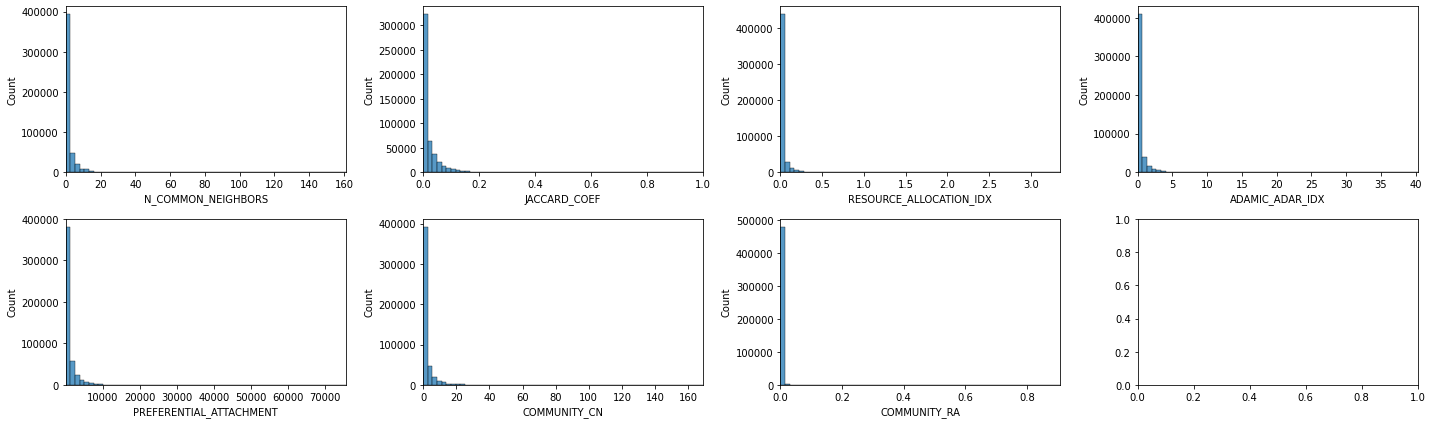

In [58]:
nrows, ncols = 2, 4
fig, axs = plt.subplots(nrows, ncols, figsize=(20,6))

for i, col in enumerate(['N_COMMON_NEIGHBORS','JACCARD_COEF','RESOURCE_ALLOCATION_IDX','ADAMIC_ADAR_IDX','PREFERENTIAL_ATTACHMENT','COMMUNITY_CN','COMMUNITY_RA']):
    
    sns.histplot(data=future_connections[col], bins=60, ax=axs[i//ncols, i%ncols]).autoscale(axis='x', tight=True);
    
fig.tight_layout()

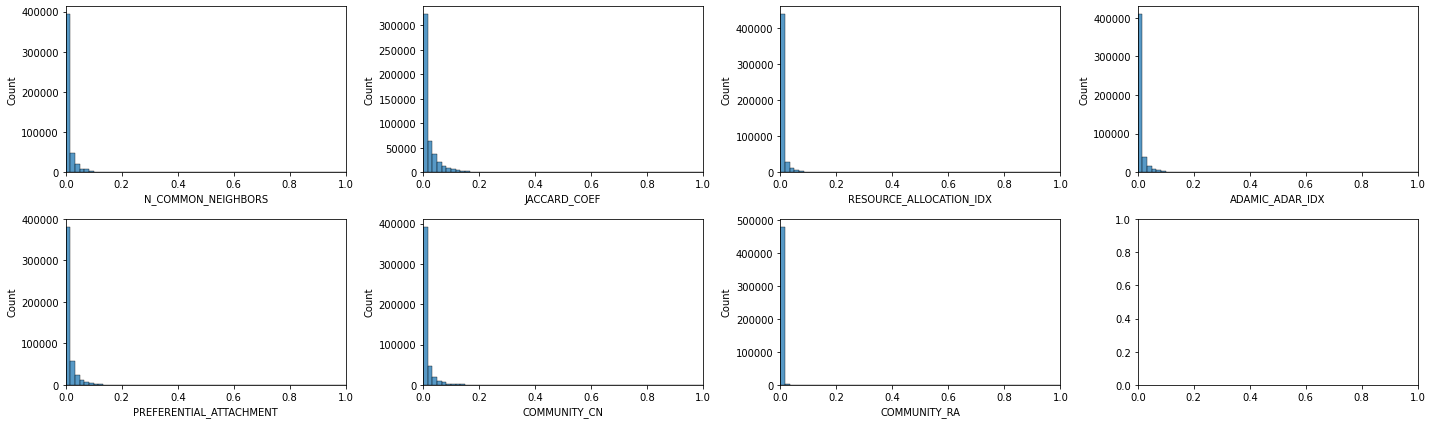

In [59]:
for feature in ['N_COMMON_NEIGHBORS','JACCARD_COEF','RESOURCE_ALLOCATION_IDX','ADAMIC_ADAR_IDX','PREFERENTIAL_ATTACHMENT','COMMUNITY_CN','COMMUNITY_RA']:
    future_connections[feature] = MinMaxScaler().fit_transform( np.array(future_connections[feature]).reshape(-1,1) )
    
nrows, ncols = 2, 4
fig, axs = plt.subplots(nrows, ncols, figsize=(20,6))
for i, col in enumerate(['N_COMMON_NEIGHBORS','JACCARD_COEF','RESOURCE_ALLOCATION_IDX','ADAMIC_ADAR_IDX','PREFERENTIAL_ATTACHMENT','COMMUNITY_CN','COMMUNITY_RA']):
    sns.histplot(data=future_connections[col], bins=60, ax=axs[i//ncols, i%ncols]).autoscale(axis='x', tight=True);    
fig.tight_layout()

In [60]:
future_connections.corr().style.background_gradient(cmap='viridis')

,Future Connection,N_COMMON_NEIGHBORS,JACCARD_COEF,RESOURCE_ALLOCATION_IDX,ADAMIC_ADAR_IDX,PREFERENTIAL_ATTACHMENT,COMMUNITY_CN,COMMUNITY_RA
Future Connection,1.000000,0.651724,0.603526,0.614138,0.652264,0.476706,0.676138,0.307982
N_COMMON_NEIGHBORS,0.651724,1.000000,0.788626,0.919763,0.996290,0.828208,0.981859,0.200548
JACCARD_COEF,0.603526,0.788626,1.000000,0.736696,0.787433,0.487891,0.822357,0.394115
RESOURCE_ALLOCATION_IDX,0.614138,0.919763,0.736696,1.000000,0.949403,0.759146,0.930542,0.348184
ADAMIC_ADAR_IDX,0.652264,0.996290,0.787433,0.949403,1.000000,0.824508,0.984327,0.234676
PREFERENTIAL_ATTACHMENT,0.476706,0.828208,0.487891,0.759146,0.824508,1.000000,0.783891,0.022402
COMMUNITY_CN,0.676138,0.981859,0.822357,0.930542,0.984327,0.783891,1.000000,0.374166
COMMUNITY_RA,0.307982,0.200548,0.394115,0.348184,0.234676,0.022402,0.374166,1.000000


In [63]:
corr = future_connections.corr()
sorted_corr = corr.abs().where( np.triu(np.ones(corr.shape), k=1).astype('bool') ).stack().sort_values(ascending=False).reset_index()
sorted_corr.columns = ['Column_1', 'Column_2', 'ABS_CORR_VAL']
sorted_corr[sorted_corr.ABS_CORR_VAL > 0.85]

,Column_1,Column_2,ABS_CORR_VAL
0,N_COMMON_NEIGHBORS,ADAMIC_ADAR_IDX,0.996290
1,ADAMIC_ADAR_IDX,COMMUNITY_CN,0.984327
2,N_COMMON_NEIGHBORS,COMMUNITY_CN,0.981859
3,RESOURCE_ALLOCATION_IDX,ADAMIC_ADAR_IDX,0.949403
4,RESOURCE_ALLOCATION_IDX,COMMUNITY_CN,0.930542
5,N_COMMON_NEIGHBORS,RESOURCE_ALLOCATION_IDX,0.919763


In [65]:
abs_corr_target = corr['Future Connection'].abs()
drop_columns = set()
for index, row in sorted_corr[sorted_corr.ABS_CORR_VAL > 0.7].iterrows():
    columns = [row.Column_1, row.Column_2]
    drop_col = columns[ np.argmin( [abs_corr_target[col] for col in columns] )]
    drop_columns.add(drop_col)
    
drop_columns

{'ADAMIC_ADAR_IDX',
 'JACCARD_COEF',
 'N_COMMON_NEIGHBORS',
 'PREFERENTIAL_ATTACHMENT',
 'RESOURCE_ALLOCATION_IDX'}

In [66]:
data = future_connections[['COMMUNITY_CN','COMMUNITY_RA','Future Connection']]
data_train_val = data[ ~data['Future Connection'].isna() ]
data_test = data[ data['Future Connection'].isna() ]
data_train_val.shape, len(data_test)

((366334, 3), 122112)

In [67]:
X_train_val= data_train_val.drop(columns=['Future Connection'])
y_train_val = data_train_val['Future Connection']
X_test = data_test.drop(columns=['Future Connection'])
y_test = data_test['Future Connection']

In [68]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

In [69]:
y_train.value_counts(dropna=False)

0.0    269631
1.0     23436
Name: Future Connection, dtype: int64

In [70]:
clf = LogisticRegression(class_weight='balanced',  # The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data
                         verbose=1,
                         random_state=42,
                         n_jobs=-1).fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.0s finished


In [71]:
roc_auc_score(y_val, clf.predict_proba(X_val)[:, 1])

0.9128412280330224

In [72]:
pd.Series(clf.predict_proba(X_val)[:, 1], index=y_val.index).sort_index()

(0, 2)          0.674986
(0, 4)          0.359138
(0, 11)         0.464444
(0, 37)         0.131354
(0, 44)         0.464444
                  ...   
(995, 999)      0.131354
(995, 1003)     0.131354
(997, 1002)     0.131354
(999, 1003)     0.131354
(1003, 1004)    0.131354
Length: 73267, dtype: float64

In [ ]:
def new_connections_predictions():
    
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.linear_model import LogisticRegression
    
    community_cn_dict = dict()
    for tup in list(nx.cn_soundarajan_hopcroft(G, community='Department')):
        community_cn_dict[(tup[0], tup[1])] = tup[2]
    
    community_ra_dict = dict()
    for tup in list(nx.ra_index_soundarajan_hopcroft(G, community='Department')):
        community_ra_dict[(tup[0], tup[1])] = tup[2]
        
    future_connections[['COMMUNITY_CN','COMMUNITY_RA']] =\
        future_connections.apply(lambda row: pd.Series([ community_cn_dict[(row.name[0], row.name[1])],
                                                         community_ra_dict[(row.name[0], row.name[1])]]), axis=1)
    
    for feature in ['COMMUNITY_CN','COMMUNITY_RA']:
        future_connections[feature] = future_connections[feature].astype('float')
        future_connections[feature] = MinMaxScaler().fit_transform( np.array(future_connections[feature]).reshape(-1,1) )
    
    data = future_connections[['COMMUNITY_CN','COMMUNITY_RA','Future Connection']]
    data_train = data[ ~data['Future Connection'].isnull() ]
    data_test = data[ data['Future Connection'].isnull() ]
    
    X_train= data_train[['COMMUNITY_CN','COMMUNITY_RA']]
    y_train = data_train['Future Connection']
    X_test = data_test[['COMMUNITY_CN','COMMUNITY_RA']]
    y_test = data_test['Future Connection']
    
    clf = LogisticRegression(solver='lbfgs',
                             class_weight='balanced',  # The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data
                             verbose=0,
                             random_state=42,
                             n_jobs=-1).fit(X_train, y_train)
    
    return pd.Series(clf.predict_proba(X_test)[:, 1], index=X_test.index).sort_index(ascending=True)